# <font color="blue">Comparing Tesseract vs CRNN based OCR</font>
In this notebook, we will compare the OCR results obtained by using Tesseract with that of Keras-ocr (i.e. CRAFT + CRNN ). 

You will see the issues associated with both methods and will be able to recognize which method to use in different scenarios.

# <font color="blue">1. Install Tesseract & Keras-OCR package</font>

In [2]:
!apt install libtesseract-dev tesseract-ocr > /dev/null
!pip install pytesseract > /dev/null
!pip install keras-ocr > /dev/null

# <font color="blue">2. Import Libraries</font>

In [1]:
import keras_ocr
import pytesseract
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# <font color="blue">3. OCR Pipeline using CRAFT & Tesseract </font>
We will use the pipeline we created earlier using CRAFT for text detection and tesseract for Text Recognition

In [4]:
detector = keras_ocr.detection.Detector()

Looking for C:\Users\Acer\.keras-ocr\craft_mlt_25k.h5


In [5]:
def tess_recognize_from_boxes(image, detections, config):
  predictions = []
  # for each box
  for i, box in enumerate(detections):
    # get the cropped and algned image
    cropped_warped = keras_ocr.tools.warpBox(image, box)

    # Perform tesseract OCR on the cropped Text
    text = pytesseract.image_to_string(cropped_warped, config=config)
    
    # Store the text and the corresponding box 
    if text:
      predictions.append((text, box))
  return predictions  

In [6]:
def modified_tesseract(image, config=('--psm 6')):
  # Detect the Text boxes from the image using Keras-ocr
  detections = detector.detect([image])[0]
  
  # Run tesseract on boxes defined above
  predictions = tess_recognize_from_boxes(image, detections, config)

  return predictions

# <font color="blue">4. OCR pipeline using keras-ocr</font>


In [7]:
pipeline = keras_ocr.pipeline.Pipeline(scale=1)

Looking for C:\Users\Acer\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\Acer\.keras-ocr\crnn_kurapan.h5


In [10]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# <font color="blue">5. Compare OCR </font>
Let us write a function to compare the two ocr output side by side.

In [11]:
def compare_ocr(filename,figsize=(20,8)):
    # Load Image
    image = keras_ocr.tools.read(filename)
    image_tess = image.copy()
    image_kerasocr = image.copy()

    # Perform OCR
    tesseract_predictions = modified_tesseract(image_tess)
    kerasocr_predictions = pipeline.recognize([image_kerasocr])

    # Create a figure with a set of subplots
    fig,axs = plt.subplots(ncols=3,nrows=1, figsize = figsize)
    axs[0].set_title("Tesseract OCR")
    axs[2].set_title("Keras OCR");

    # Display Tesseract Output
    keras_ocr.tools.drawAnnotations(image_tess, tesseract_predictions,ax=axs[0])

    # Add a divider
    axs[1].imshow(np.zeros((image.shape[0],2)))
    axs[1].set_yticks([])
    axs[1].set_xticks([])

    # Display keras ocr output
    keras_ocr.tools.drawAnnotations(image_kerasocr, kerasocr_predictions[0],ax=axs[2])


## <font color="blue">5.1. Test Image 1: Image of a Book</font>


In [ ]:
!wget https://www.dropbox.com/s/uwrdek4jjac4ysz/book2.jpg?dl=1 -O book2.jpg --quiet

### <font color="green">Downloaded Image</font>

<img src="https://www.dropbox.com/s/uwrdek4jjac4ysz/book2.jpg?dl=1" width=500>

### <font color="green">Output</font>

1/1 [==============================] - 5s 5s/step


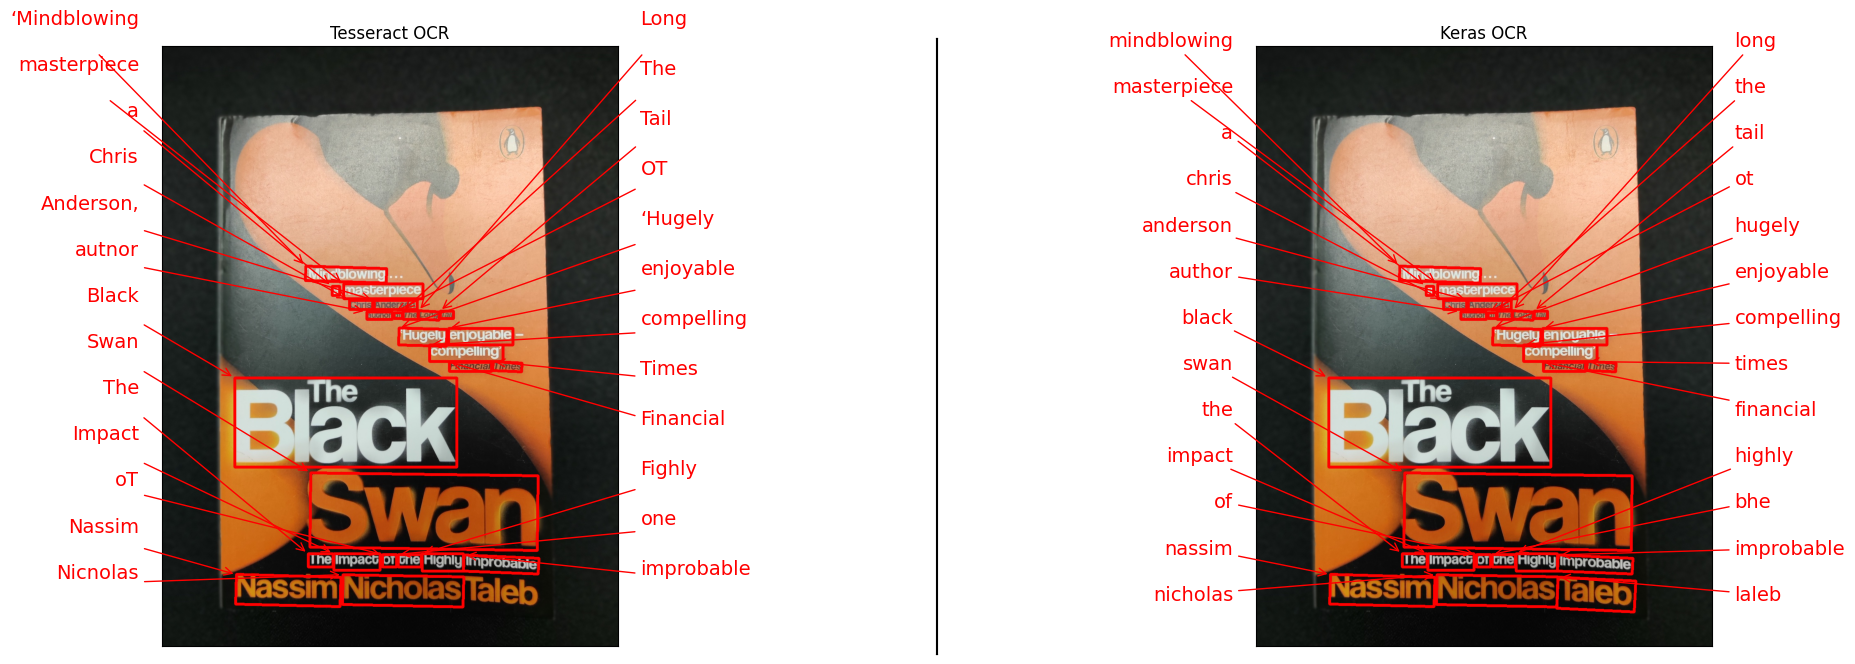

In [12]:
compare_ocr("book2.jpg")

## <font color="blue">5.2. Street Sign 1</font>


In [ ]:
!wget https://www.dropbox.com/s/uwlnxiihqgni57o/streetsign1.jpg?dl=0 -O streetsign1.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/uwlnxiihqgni57o/streetsign1.jpg?dl=1" width=500>

### <font color="green">Output</font>

1/1 [==============================] - 2s 2s/step


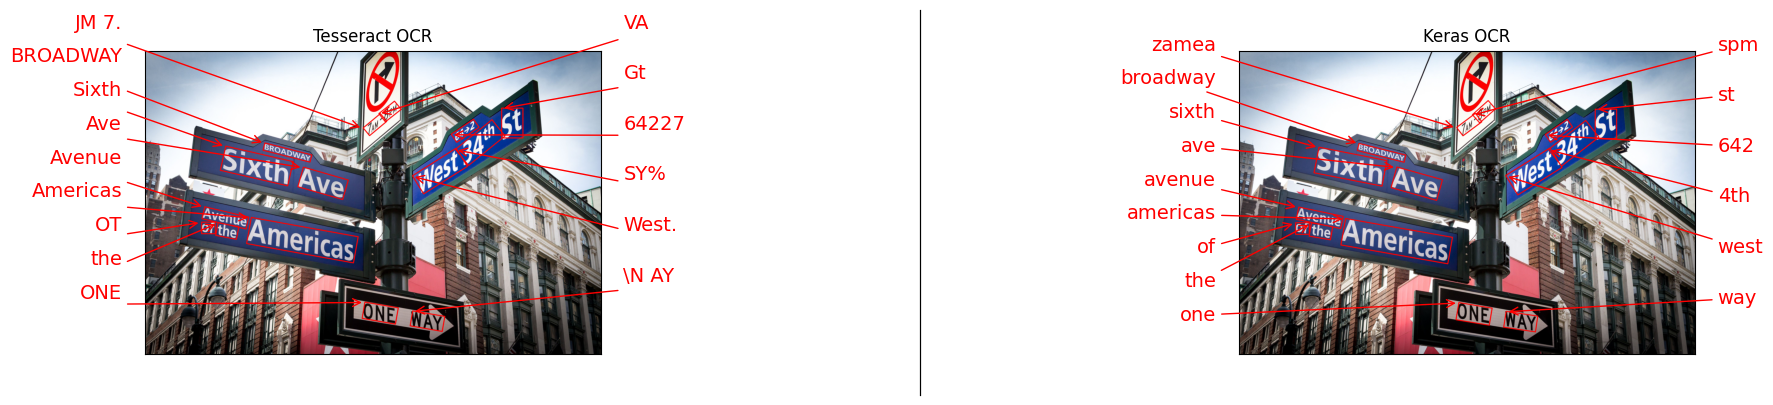

In [13]:
compare_ocr("demo2.jpg",figsize=(20,5))

### <font color="green">Observation</font>
CRNN does a pretty good job. Tesseract is able to recognize some of the text, but not as good as CRNN

## <font color="blue">5.3. Street Sign 2</font>

In [ ]:
!wget https://www.dropbox.com/s/dbkag5gsicxqoqg/streetsign2.jpg?dl=0 -O streetsign2.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/dbkag5gsicxqoqg/streetsign2.jpg?dl=1" width=500>

### <font color="green">Output</font>

1/1 [==============================] - 1s 1s/step


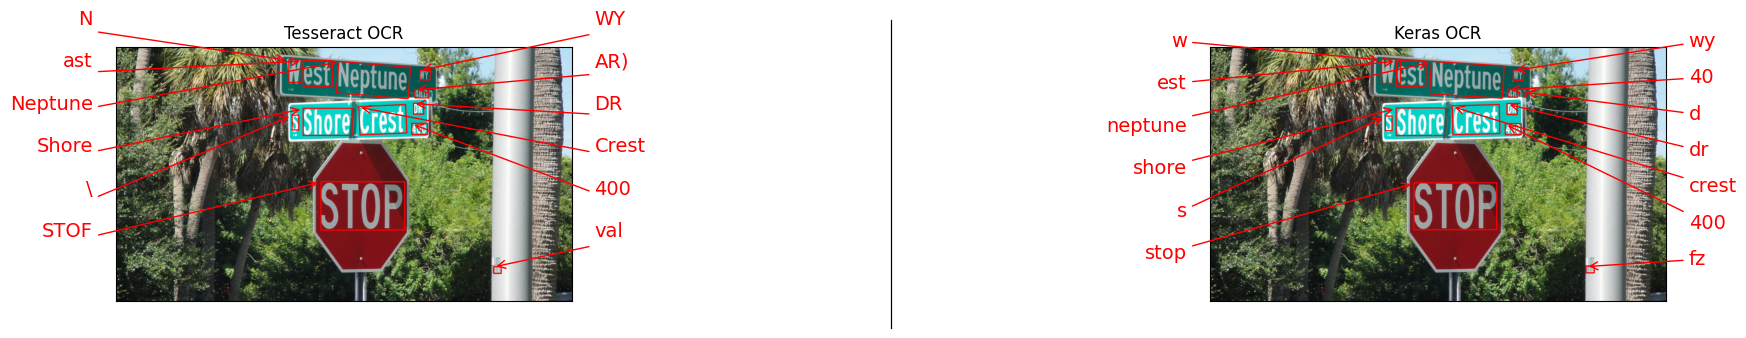

In [14]:
compare_ocr("demo3.jpg",figsize=(20,4))

### <font color="green">Observation</font>
Tesseract fails to detect almost anything. 

## <font color="blue">5.4. Street Sign 3</font>

In [ ]:
!wget https://www.dropbox.com/s/cgni28zl1k9sesk/streetsign3.jpg?dl=0 -O streetsign3.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.dropbox.com/s/cgni28zl1k9sesk/streetsign3.jpg?dl=1" width=600>

### <font color="green">Output</font>

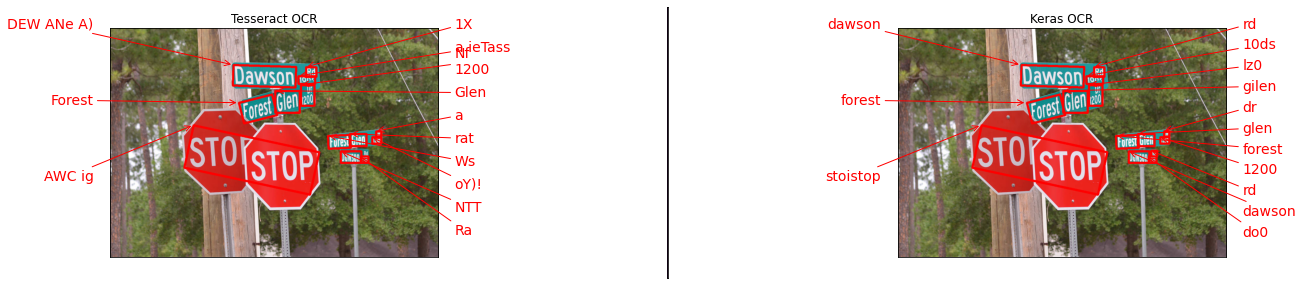

In [76]:
compare_ocr("streetsign3.jpg",figsize=(20,5))

### <font color="green">Observation</font>
Tesseract cannot beat CRNN yet again!

## <font color="blue">5.5. Random Road Scene</font>

In [ ]:
!wget https://c2.staticflickr.com/4/3733/10615171616_56211d03f8_o.jpg -O scene.jpg --quiet

### <font color="green">Downloaded Image</font>
<img src="https://c2.staticflickr.com/4/3733/10615171616_56211d03f8_o.jpg" width=600>

### <font color="green">Output</font>

In [1]:
compare_ocr("demo4.jpg",figsize=(20,5))

NameError: name 'compare_ocr' is not defined

### <font color="green">Observation</font>
You can see that the number plate was recognized correctly by both of them. But the other text was not detected by Tesseract. 

## <font color="blue">5.6. Receipts</font>
This is a really important example because it will give you greater insights into what each method can or cannot do. Check out the observations.

In [ ]:
!wget https://www.learnopencv.com/wp-content/uploads/2018/06/receipt.png -O receipt.png --quiet

### <font color="green">Downloaded Image</font>
<img src="https://www.learnopencv.com/wp-content/uploads/2018/06/receipt.png" width=300>

### <font color="green">Output</font>

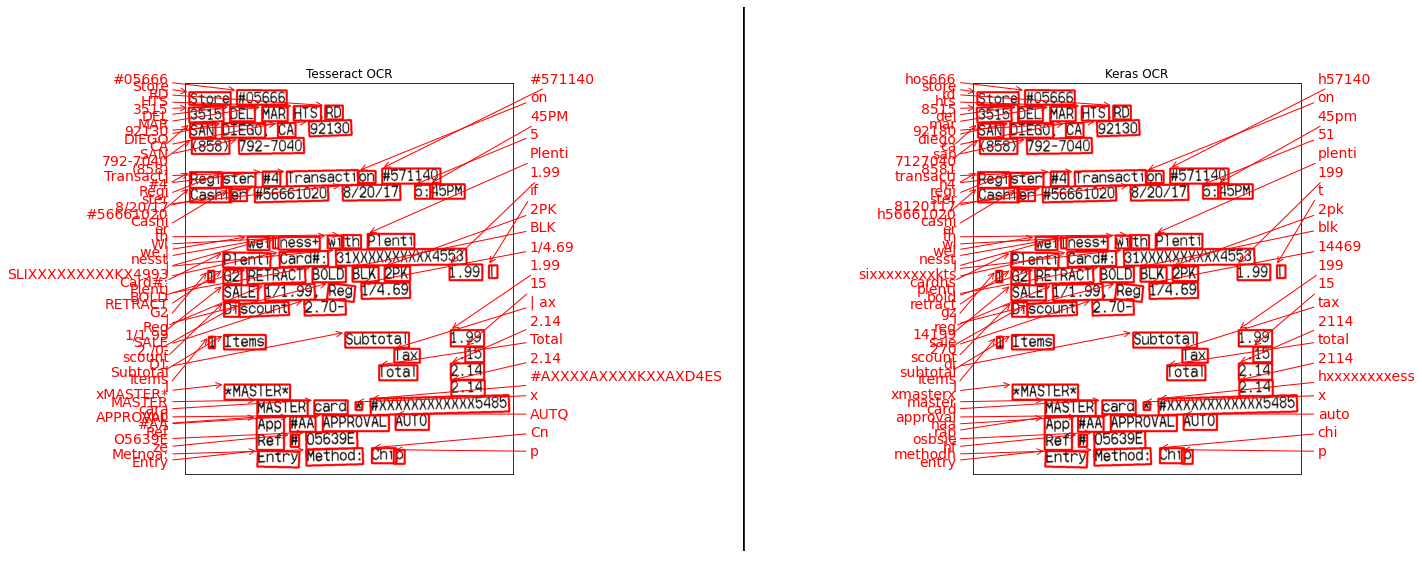

In [28]:
compare_ocr("receipt.png",figsize=(20,10))

Let us compare it with Tesseract directly applied to the input image.

In [26]:
text = pytesseract.image_to_string("receipt.png")
print(text)

Store #05666

3515 DEL MAR HTS,RD
SAN DIEGO, CA 92130
(858) 792-7040

Register #4 Transaction #571140
Cashier #56661020 8/20/17 5:45PM

wellness+ with Plenti
Plenti Card#: 31XXXXXXXXXX4553
1 G2 RETRACT BOLD BLK 2PK 1.99 T
SALE 1/1.99, Reg 1/4.69
Discount 2.70-

1 Items Subtotal 1.99
Tax .15

Total 2.14
xMASTER* 2.14

MASTER card * #XXXXXXXXXXXX5485
Apo #AA APPROVAL AUTO

Ref # O5639E

Entry Method: Chip


### <font color="green">Observation</font>
If you look closely, you will be able to find the following:
1. Both methods are able to identify the text almost at the same accuracy.
1. Tesseract is able to detect all special characters such as **`$ , # , . , : , `** whereas CRNN is not able to do so and incorrectly labels `#->h` , `:->1` and misses out on the all important `"."` so `1.99->199`.
1. Since this is a nice document with white background and black text, it is able to detect the text even without detecting text!


# <font color="blue">6. Final Thoughts and Tips</font>
1. For document OCR ( like Scans of resume/invoice/receipts ), try with Tesseract ( using scaling helps in most cases ). It might work even without text detection
1. For document OCR ( such as Books ) OCR preserves the order of text easily. If you use other methods, you need to handle that separately and might have to do some post-processing to get the text in the correct order.
1. For natural scene images ( such as traffic signs, hoardings and detecting random texts ) - it is better to perform text detection since the text might be a small part of the image and then use either tesseract or CRNN or other methods - You should arrive at a conclusion only after doing some experiments with your data. 
